# The Quick satrt *numpy* tutorial in scipy.org


## The Basics
numpy中维度被称作axes，axes的个数称为rank

与R中不同的是，此处的dimension指的是rank；

In [1]:
import numpy as np
a = np.random.randn(3,5)
a

array([[-2.22918214,  0.70671908,  0.79970209, -0.58433732,  0.20060977],
       [-0.33633786, -0.03466606,  0.54752157,  0.12364006,  0.67634353],
       [-0.89276152, -1.60767472,  0.63704732,  0.99143695, -1.71508642]])

In [2]:
a.ndim # dim,几维

2

In [3]:
a.shape # 这个才是R中的维度，几*几

(3, 5)

In [4]:
print a.size # 总共多少个元素
print a.dtype # 数值类型
print a.itemsize #每个数的字节数

15
float64
8


In [5]:
a.dtype.name

'float64'

In [6]:
type(a)  # numpy中的ndarray类型

numpy.ndarray

## Array Creation

+ 从list和tuple中生成

In [7]:
a = np.array([3,4,4,5])
a

array([3, 4, 4, 5])

In [8]:
a.dtype

dtype('int64')

In [9]:
a = np.array((1.9,2.0,3.9))
print a
print a.dtype

[ 1.9  2.   3.9]
float64


In [10]:
np.array(((1,2,3),(3,4,5)))

array([[1, 2, 3],
       [3, 4, 5]])

In [11]:
a=np.array([[1,2,3],[1,2,3]])
a

array([[1, 2, 3],
       [1, 2, 3]])

In [12]:
a.shape

(2, 3)

+ 如何指定数据类型呢?


In [13]:
np.array([[1,2],[3,4]], dtype=complex)

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

+ 由于array的size大小往往是事先就已经知晓的，往往可以先生成好，之后在元素上做修改；因为不断增加一个array的大小，往往开销过大；

+ zeros,ones,empty

In [14]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [15]:
a=np.ones((2,3,4), dtype = np.int16)
a

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [16]:
np.diag([1,1,1,1])

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [17]:
x = np.array([[1,2,3],[3,4,5],[4,5,6]])
print x
print np.diag(x)

[[1 2 3]
 [3 4 5]
 [4 5 6]]
[1 4 6]


In [18]:
np.diag(x, k =-1)

array([3, 5])

In [19]:
np.diag(x, k =1)

array([2, 5])

In [20]:
np.diag(np.diag(x))

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 6]])

In [21]:
np.empty([2,3], dtype=float)  

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [22]:
a = np.array([[1,2,3],[3,4,5]])
np.empty_like(a)

array([[0, 0, 0],
       [0, 0, 0]])

In [23]:
np.eye(2,3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [24]:
# 还可以指定在哪一个窗宽上为1
np.eye(4, k = 1)

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.]])

### fromfunction
从一个函数处生成

In [25]:
np.fromfunction(lambda i,j : i == j, (3,3), dtype = int)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]], dtype=bool)

In [26]:
np.fromfunction(lambda i,j: i+j , (3,3), dtype = int)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### fromiter
从一个可迭代对象处生成

In [27]:
a = (x ** 2 for x in range(6))
a

<generator object <genexpr> at 0x10be468c0>

In [28]:
np.fromiter(a, np.float)

array([  0.,   1.,   4.,   9.,  16.,  25.])

In [29]:
a = (x ** 2 for x in range(6))
np.fromiter(a, np.float,count=4) # count 表示只读取几个数

array([ 0.,  1.,  4.,  9.])

+ 产生序列
但由于浮点数的精度问题，当arange被用在浮点数上时，不太能判断到底出现多少个值，可以考虑使用linspace

In [30]:
np.arange(10, 30, 5) # 左闭右开,间隔为5

array([10, 15, 20, 25])

In [31]:
print np.arange(0,0.1,0.01)
print np.arange(0,0.1,0.01).shape

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09]
(10,)


In [32]:
np.linspace(0, 2, 9)  # 一共9个数

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

### print array
+ 最后一个axis是从左到右打印的
+ 倒数第二个axis是从上到下打印的
+ 其余的也是从上到下打印，之间用空行隔开

In [33]:
b = np.arange(24).reshape(4,6)
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [34]:
print b

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [35]:
b.reshape(2,3,4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## 基本操作


In [36]:
# * 是对于元素相乘
A = np.array([[1,2], [3,4]])
A

array([[1, 2],
       [3, 4]])

In [37]:
B = np.array([[2,3], [3,4]])
B

array([[2, 3],
       [3, 4]])

In [38]:
A * B # 对应元素相乘

array([[ 2,  6],
       [ 9, 16]])

In [39]:
# 普通矩阵乘法
A.dot(B)

array([[ 8, 11],
       [18, 25]])

In [40]:
np.dot(A,B)

array([[ 8, 11],
       [18, 25]])

+ in-place operation,自加或自乘


In [41]:
A

array([[1, 2],
       [3, 4]])

In [42]:
A *= 3

In [43]:
A

array([[ 3,  6],
       [ 9, 12]])

In [44]:
A += 1
A

array([[ 4,  7],
       [10, 13]])

In [45]:
print A.sum()
print A.min(), A.max()

34
4 13


+ 需要指定在哪一个维度上进行aggregate操作时，指定axis维度

In [46]:
b = np.arange(12).reshape(3,4)
b


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
b.sum(axis = 0)  # sum of each col

array([12, 15, 18, 21])

In [48]:
b.sum(axis = 1) # sum of each row

array([ 6, 22, 38])

In [49]:
np.exp(b)

array([[  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
          2.00855369e+01],
       [  5.45981500e+01,   1.48413159e+02,   4.03428793e+02,
          1.09663316e+03],
       [  2.98095799e+03,   8.10308393e+03,   2.20264658e+04,
          5.98741417e+04]])

In [50]:
np.all(b >= 2, axis = 0)

array([False, False,  True,  True], dtype=bool)

In [51]:
np.any(b >=2, axis = 0)

array([ True,  True,  True,  True], dtype=bool)

In [52]:
np.isfinite(np.inf)

False

### apply_along_axis：
类似于R中apply函数

In [53]:
def myfunc(x):
    return x[0]+x[1]

np.apply_along_axis(myfunc, 0, b)

array([ 4,  6,  8, 10])

In [54]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [55]:
np.apply_along_axis(sum, 0, b)

array([12, 15, 18, 21])

In [56]:
np.apply_along_axis(sorted, 0, b)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### argmax,argmin

In [57]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [58]:
a.argmax(axis=0)  # 返回在0维处最大值所在的索引值

array([1, 1, 1])

In [59]:
np.argmax(a, axis = 0)

array([1, 1, 1])

In [60]:
np.argmax(a, axis = 1)

array([2, 2])

In [61]:
# 注意这里argmax将只会返回，第一个找到的索引值
b = np.arange(6)
b[1] = 5
print b

np.argmax(b) # Only the first occurrence is returned.


[0 5 2 3 4 5]


1

### argsort
返回索引值，可以作为sort(即按照return的索引值取元素，可以形成一个排列好的array)

In [62]:
a = np.array([[0,3],[2,1]])
a.argsort()

array([[0, 1],
       [1, 0]])

In [63]:
np.argsort(a, axis = 0)

array([[0, 1],
       [1, 0]])

In [64]:
np.argsort(a, axis = 1)

array([[0, 1],
       [1, 0]])

### average
在某一个axis上进行加权平均

In [65]:
np.average(range(1,11), weights=range(10,0,-1))

4.0

In [66]:
data = np.arange(6).reshape(3,2)
data

array([[0, 1],
       [2, 3],
       [4, 5]])

In [67]:
np.average(data, axis=1, weights=[1./4, 3./4])

array([ 0.75,  2.75,  4.75])

### ceil, floor
+ ceil: 向上取整
+ floor: 向下取整
+ trunc: return the truncated value of the input;更接近于0

In [68]:
a = np.array([-1.7, -1.6, 1.0, 7.8])
a

array([-1.7, -1.6,  1. ,  7.8])

In [69]:
np.ceil(a)

array([-1., -1.,  1.,  8.])

In [70]:
np.floor(a)

array([-2., -2.,  1.,  7.])

In [71]:
np.trunc(a)

array([-1., -1.,  1.,  7.])

### clip
压缩到一个区间内

In [72]:
a = np.arange(10)
np.clip(a, 1, 9)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
np.clip(a, 1, 9, out = a) # 直接out到a,a被改变了

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
a

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### conj: 返回共轭的复数值

In [75]:
print np.conjugate(1+2j)
print np.conj(1-2j)

(1-2j)
(1+2j)


In [76]:
x = np.eye(2) + 1j
x

array([[ 1.+1.j,  0.+1.j],
       [ 0.+1.j,  1.+1.j]])

In [77]:
np.conj(x)

array([[ 1.-1.j,  0.-1.j],
       [ 0.-1.j,  1.-1.j]])

### corrcoef
Person product-moment correlation coefficients

In [78]:
a = np.arange(6).reshape(2,3)
b = np.random.randn(2,3)
b

array([[-0.92764013,  0.29216659, -1.68402108],
       [ 0.41128429, -0.28298301, -0.05816932]])

In [79]:
np.corrcoef(a,b)

array([[ 1.        ,  1.        , -0.37928699, -0.66261242],
       [ 1.        ,  1.        , -0.37928699, -0.66261242],
       [-0.37928699, -0.37928699,  1.        , -0.44167903],
       [-0.66261242, -0.66261242, -0.44167903,  1.        ]])

### cov

In [80]:
x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X = np.vstack((x,y))
print(np.cov(X))


print(np.cov(x, y))


print(np.cov(x))

[[ 11.71        -4.286     ]
 [ -4.286        2.14413333]]
[[ 11.71        -4.286     ]
 [ -4.286        2.14413333]]
11.71


In [81]:
X

array([[-2.1 , -1.  ,  4.3 ],
       [ 3.  ,  1.1 ,  0.12]])

### cross, inner,outer
cross product
inner product
outer product

In [82]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[4,5,6], [1,2,3]])
np.cross(x, y)

array([[-3,  6, -3],
       [ 3, -6,  3]])

In [83]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(4)
np.inner(a, b)

array([[ 14,  38,  62],
       [ 86, 110, 134]])

In [84]:
np.outer(a,b)

array([[ 0,  0,  0,  0],
       [ 0,  1,  2,  3],
       [ 0,  2,  4,  6],
       [ 0,  3,  6,  9],
       [ 0,  4,  8, 12],
       [ 0,  5, 10, 15],
       [ 0,  6, 12, 18],
       [ 0,  7, 14, 21],
       [ 0,  8, 16, 24],
       [ 0,  9, 18, 27],
       [ 0, 10, 20, 30],
       [ 0, 11, 22, 33],
       [ 0, 12, 24, 36],
       [ 0, 13, 26, 39],
       [ 0, 14, 28, 42],
       [ 0, 15, 30, 45],
       [ 0, 16, 32, 48],
       [ 0, 17, 34, 51],
       [ 0, 18, 36, 54],
       [ 0, 19, 38, 57],
       [ 0, 20, 40, 60],
       [ 0, 21, 42, 63],
       [ 0, 22, 44, 66],
       [ 0, 23, 46, 69]])

In [85]:
x = np.array(['a', 'b', 'c'], dtype=object)
np.outer(x, [1, 2, 3])


array([['a', 'aa', 'aaa'],
       ['b', 'bb', 'bbb'],
       ['c', 'cc', 'ccc']], dtype=object)

### cumsum,cumprod
累积和和累积

In [86]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [87]:
a.cumprod(axis = 1)

array([[[   0,    1,    2,    3],
        [   0,    5,   12,   21],
        [   0,   45,  120,  231]],

       [[  12,   13,   14,   15],
        [ 192,  221,  252,  285],
        [3840, 4641, 5544, 6555]]])

In [88]:
np.cumprod(a,axis=0)

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[  0,  13,  28,  45],
        [ 64,  85, 108, 133],
        [160, 189, 220, 253]]])

In [89]:
np.cumsum(a, axis = 1)

array([[[ 0,  1,  2,  3],
        [ 4,  6,  8, 10],
        [12, 15, 18, 21]],

       [[12, 13, 14, 15],
        [28, 30, 32, 34],
        [48, 51, 54, 57]]])

### diff
返回后一个元素与上一个元素的差

In [90]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [91]:
np.diff(a, axis = 0)

array([[[12, 12, 12, 12],
        [12, 12, 12, 12],
        [12, 12, 12, 12]]])

In [92]:
np.diff(a, axis = 1)

array([[[4, 4, 4, 4],
        [4, 4, 4, 4]],

       [[4, 4, 4, 4],
        [4, 4, 4, 4]]])

### maximum, minimum

The maximum is equivalent to np.where(x1 >= x2, x1, x2)

In [93]:
np.maximum([2,3,4],[4,2,1])

array([4, 3, 4])

In [94]:
np.maximum(np.eye(2), [0.5, 2]) # broadcasting

array([[ 1. ,  2. ],
       [ 0.5,  2. ]])

In [95]:
np.maximum([np.nan, 0, np.nan], [0, np.nan, np.nan])

array([ nan,  nan,  nan])

In [96]:
np.minimum([np.nan, 0, np.nan], [0, np.nan, np.nan])

array([ nan,  nan,  nan])

In [97]:
np.maximum(np.Inf, 1)

inf

In [98]:
a = np.zeros((2, 512*512), dtype=np.float32)
a.shape

(2, 262144)

In [99]:
a[0, :] = 1
a[1, :] = 0.1
np.mean(a)

0.54999924

In [100]:
np.mean(a, dtype=np.float64)

0.55000000074505806

### nonzero
返回非零元素所在的位置

In [101]:
x = np.eye(3)
x

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [102]:
np.nonzero(x)

(array([0, 1, 2]), array([0, 1, 2]))

In [103]:
np.transpose(np.nonzero(x))

array([[0, 0],
       [1, 1],
       [2, 2]])

In [104]:
x[np.nonzero(x)]

array([ 1.,  1.,  1.])

### prod
计算指定axis内的积

In [105]:
a

array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1]], dtype=float32)

In [106]:
np.prod(a, axis = 1)

array([ 1.,  0.], dtype=float32)

### sort
Return a sorted copy of an array.


|kind	|speed	|worst case	|work space	|stable
|-----|------|--------|---|-----|------
|‘quicksort’	|1	|O(n^2)	|0	|no
|‘mergesort’	|2	|O(n*log(n))	|~n/2	|yes
|‘heapsort’	|3	|O(n*log(n))	|0	|no

In [107]:
np.sort(a, axis = 1, kind = 'mergesort')

array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [ 0.1,  0.1,  0.1, ...,  0.1,  0.1,  0.1]], dtype=float32)

In [108]:
a.trace()

1.1

In [109]:
a = np.eye(3)
np.trace(a, offset=0)

3.0

In [110]:
np.trace(a, offset=1) # 主对角线之外多少

0.0

### vdot
两个向量的点积

In [111]:
a = np.array([[1, 4], [5, 6]])
b = np.array([[4, 1], [2, 2]])
print np.vdot(a, b)

print np.vdot(b, a)

30
30


### vectorize
类似于map

In [112]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b


In [113]:
vfunc = np.vectorize(myfunc)
vfunc(np.arange(6),2)

array([2, 3, 4, 1, 2, 3])

+ output type 是受input的值决定，当然也可以指定otype来改变。

In [114]:
out = vfunc([1,2,3,4], 2)
type(out[0])

numpy.int64

In [115]:
vfunc = np.vectorize(myfunc, otypes=[np.float])
type(vfunc([1,2,3,4], 2)[0])

numpy.float64

In [116]:
[1,2,3,4].pop()

4

+ excluded 参数可以不使得某一参数向量化

In [117]:
def mypolyval(p, x):
    _p = list(p)
    res = _p.pop(0)
    while _p:
        res = res*x + _p.pop(0)
    return res
vpolyval = np.vectorize(mypolyval, excluded=['p'])
vpolyval(p=[1, 2, 3], x=[0, 1])

array([3, 6])

## 索引index，切片，迭代
需要注意的是，这里的索引得到的array都不是一个copy，全是在原来地址上得到的操作。都是一个引用。

In [118]:
a = np.arange(10) ** 3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [119]:
a[3]

27

In [120]:
a[2:5]  # 左闭右开

array([ 8, 27, 64])

In [121]:
a[:6:2] = 100
a

array([100,   1, 100,  27, 100, 125, 216, 343, 512, 729])

In [122]:
# 颠倒a
a[::-1]

array([729, 512, 343, 216, 125, 100,  27, 100,   1, 100])

In [123]:
# 同时a也是一个可迭代的对象
for i in a:
    print i**(1/3.)

4.64158883361
1.0
4.64158883361
3.0
4.64158883361
5.0
6.0
7.0
8.0
9.0


### 多维array

In [124]:
b = np.random.randn(3,4)
b

array([[-1.51751033, -0.56990661,  0.22973813, -0.38544515],
       [-0.40342539,  0.85834385,  0.6772425 ,  0.85631043],
       [-0.2447616 ,  0.60625505,  1.18489172, -0.79116379]])

In [125]:
b[2,3]

-0.79116379003809845

In [126]:
b[0:2, 1]

array([-0.56990661,  0.85834385])

In [127]:
b[:,1]

array([-0.56990661,  0.85834385,  0.60625505])

In [128]:
b[0:2,:]

array([[-1.51751033, -0.56990661,  0.22973813, -0.38544515],
       [-0.40342539,  0.85834385,  0.6772425 ,  0.85631043]])

In [129]:
b[0:2,]

array([[-1.51751033, -0.56990661,  0.22973813, -0.38544515],
       [-0.40342539,  0.85834385,  0.6772425 ,  0.85631043]])

In [130]:
b[-1] # 和b[-1, :]是等价的

array([-0.2447616 ,  0.60625505,  1.18489172, -0.79116379])

In [131]:
### 二维以上的array
b = np.arange(24).reshape(2,3,4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [132]:
b[1,2,...]  # 用...代替后面出现的:

array([20, 21, 22, 23])

In [133]:
b[1,...]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [134]:
b[...,2]

array([[ 2,  6, 10],
       [14, 18, 22]])

### iter
多维array中，迭代的项是第一维；倘若想要对array中每一个元素进行迭代，可以考虑使用flat

In [135]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [136]:
for item in b:
    print item,'hha'

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] hha
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]] hha


In [137]:
for element in b.flat:
    print element

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [138]:
b.flat # b.flat其实是一个迭代器了

In [139]:
y = np.arange(35).reshape(5,7)
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [140]:
y[np.array([0,2,4]), np.array([0,1,2])]

array([ 0, 15, 30])

In [141]:
y[np.array([0,2,4])]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [28, 29, 30, 31, 32, 33, 34]])

+ 当bool值array比实际的维度小时，就会认为其等价于y[b,...]

In [142]:
x = np.arange(30).reshape(2,3,5)
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [143]:
b = np.array([[True, True, False], [False, True, True]])
x[b]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [144]:
x[b,...]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

### np.newaxis
添加一个size为1的axis

In [145]:
y.shape

(5, 7)

In [146]:
y[:, np.newaxis, :].shape

(5, 1, 7)

In [147]:
x = np.arange(5)
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [148]:
x[np.newaxis,:]

array([[0, 1, 2, 3, 4]])

In [149]:
x[:,np.newaxis] + x[np.newaxis,:]

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

### 赋值
numpy中的赋值会直接在源数据上进行操作修改

+ 可以发现如果把float赋值给int，会先强制转换为int
+ 加入将complex赋值给int或者floats，会报错

In [150]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [151]:
x[0] = 2.1
x

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [152]:
x[0]  # x[0]变成了2！！

2

In [153]:
x[2:7] = 1

In [154]:
x

array([2, 1, 1, 1, 1, 1, 1, 7, 8, 9])

In [155]:
x[0]=1.2j  # 会报错

TypeError: can't convert complex to long

### ndenumerate


In [156]:
a = np.array([[1, 2], [3, 4]])
for index, x in np.ndenumerate(a):
    print index, x

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4


## shape操作

In [157]:
a = np.floor(10*np.random.random((3,4)))
a

array([[ 2.,  1.,  1.,  6.],
       [ 8.,  3.,  9.,  9.],
       [ 5.,  0.,  6.,  9.]])

In [158]:
a.shape

(3, 4)

shape的变化有很多种，但是这些操作都不会更改原先的array

In [159]:
a.ravel()

array([ 2.,  1.,  1.,  6.,  8.,  3.,  9.,  9.,  5.,  0.,  6.,  9.])

In [160]:
a.reshape(6,2)

array([[ 2.,  1.],
       [ 1.,  6.],
       [ 8.,  3.],
       [ 9.,  9.],
       [ 5.,  0.],
       [ 6.,  9.]])

In [161]:
a.shape # 原先的a并没有发生改变

(3, 4)

In [162]:
a.T

array([[ 2.,  8.,  5.],
       [ 1.,  3.,  0.],
       [ 1.,  9.,  6.],
       [ 6.,  9.,  9.]])

**可是如果想要真正地将原先的数据改变咋办呢？**
+ 可以使用resize函数

In [163]:
a.resize((2,6))
a  # a真的改变了

array([[ 2.,  1.,  1.,  6.,  8.,  3.],
       [ 9.,  9.,  5.,  0.,  6.,  9.]])

In [164]:
# -1表示该维度将自动计算
a.reshape((-1,4)).shape

(3, 4)

## stack
拼接不同的array，类似于rbind和cbind
+ vstack:行拼接
+ hstack:列拼接

In [165]:
a = np.floor(10 * np.random.randn(2,2))
a

array([[ -1.,   7.],
       [ 23., -16.]])

In [166]:
b = np.floor(10 * np.random.randn(2,2))
b

array([[  0.,  12.],
       [-11.,  -7.]])

In [167]:
np.hstack((a,b))

array([[ -1.,   7.,   0.,  12.],
       [ 23., -16., -11.,  -7.]])

In [168]:
np.vstack((a,b))

array([[ -1.,   7.],
       [ 23., -16.],
       [  0.,  12.],
       [-11.,  -7.]])

In [169]:
np.vstack(([1,2],b))

array([[  1.,   2.],
       [  0.,  12.],
       [-11.,  -7.]])

In [170]:
np.hstack(([1,2],b)) # hstack不能用1维的去与2维的合并

ValueError: all the input arrays must have same number of dimensions

In [171]:
np.column_stack((np.arange(2),b))

array([[  0.,   0.,  12.],
       [  1., -11.,  -7.]])

In [172]:
a = np.array([4.,2.])
b = np.array([2.,8.])
a[:,np.newaxis]

array([[ 4.],
       [ 2.]])

In [173]:
np.column_stack((a[:,np.newaxis],b[:,np.newaxis]))

array([[ 4.,  2.],
       [ 2.,  8.]])

In [174]:
np.vstack((a[:,np.newaxis],b[:,np.newaxis])) # The behavior of vstack is different


array([[ 4.],
       [ 2.],
       [ 2.],
       [ 8.]])

### r_ , c_

In [175]:
np.r_[1:4, 0,6]

array([1, 2, 3, 0, 6])

In [176]:
np.r_[a,b]

array([ 4.,  2.,  2.,  8.])

In [177]:
np.c_[a,b]

array([[ 4.,  2.],
       [ 2.,  8.]])

## split one array into serveral smaller ones

In [178]:
a = np.floor(10*np.random.random((2,12)))
a

array([[ 2.,  2.,  7.,  4.,  6.,  9.,  9.,  1.,  3.,  1.,  8.,  2.],
       [ 3.,  7.,  1.,  9.,  4.,  8.,  7.,  0.,  8.,  3.,  6.,  6.]])

In [179]:
np.hsplit(a, 3) # 按照列分成3个

[array([[ 2.,  2.,  7.,  4.],
        [ 3.,  7.,  1.,  9.]]), array([[ 6.,  9.,  9.,  1.],
        [ 4.,  8.,  7.,  0.]]), array([[ 3.,  1.,  8.,  2.],
        [ 8.,  3.,  6.,  6.]])]

In [180]:
np.hsplit(a,(3,4))   
# Split a after the third and the fourth column

[array([[ 2.,  2.,  7.],
        [ 3.,  7.,  1.]]), array([[ 4.],
        [ 9.]]), array([[ 6.,  9.,  9.,  1.,  3.,  1.,  8.,  2.],
        [ 4.,  8.,  7.,  0.,  8.,  3.,  6.,  6.]])]

## 究竟是copy还是Views

### assignment不是copy

In [181]:
a = np.arange(12)
b = a
b is a

True

In [182]:
b.shape = 3,4
a.shape

(3, 4)

In [183]:
id(a)

4499834800

In [184]:
id(b)  # b不是一个copy，他们指向同一个地址

4499834800

### View or shallow copy
slice就是返回一个view；view可以理解为shallow copy，只copy它的data。

In [185]:
c = a.view()
c is a

False

In [186]:
c.base is a # c is a view of thr data owned by a

True

In [187]:
c.flags.owndata

False

In [188]:
c.shape = 2,6
a.shape  # a不会变化

(3, 4)

+ 但是数据可以被改变，因为c和a是共享数据的

In [189]:
c[0,4]=21212112
a

array([[       0,        1,        2,        3],
       [21212112,        5,        6,        7],
       [       8,        9,       10,       11]])

In [190]:
# slice return a view of it
s = a[:, 1:3]
s[:] = 10
a         # 变化了

array([[       0,       10,       10,        3],
       [21212112,       10,       10,        7],
       [       8,       10,       10,       11]])

### Deep copy
`copy`函数会copy data和整个array

In [191]:
d = a.copy()
d is a

False

In [192]:
d.base is a

False

In [193]:
d[0,0] = 12121223322
a  # a不会发生变化

array([[       0,       10,       10,        3],
       [21212112,       10,       10,        7],
       [       8,       10,       10,       11]])

## Fancy indexing： index tricks

### indexing with arrays

In [194]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [195]:
i = np.array([1,1,3,8,5])
a[i]

array([ 1,  1,  9, 64, 25])

In [196]:
j = np.array([[3,4],[9,7]])
a[j]

array([[ 9, 16],
       [81, 49]])

当需要取索引的矩阵是多维的话，每一个index中的值都指在第一个维度上。

In [197]:
palette = np.array( [ [0,0,0],                # black
                      [255,0,0],              # red
                      [0,255,0],              # green
                      [0,0,255],              # blue
                      [255,255,255] ] )       # white
image = np.array( [ [ 0, 1, 2, 0 ],           # each value corresponds to a color in the palette
                    [ 0, 3, 4, 0 ]  ] )
palette[image]                            # the (2,4,3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [198]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [199]:
i = np.array([[0,1],
             [1,2]])
j = np.array([[2,1],
             [3,3]])
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [200]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [201]:
a[i,:]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [202]:
a[:,j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

In [203]:
a[i,]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [204]:
l = [i,j]
a[l]

array([[ 2,  5],
       [ 7, 11]])

In [205]:
s = np.array( [i,j] )
a[s]# not what we want


IndexError: index 3 is out of bounds for axis 0 with size 3

In [206]:
a[tuple(s)]                                # same as a[i,j]


array([[ 2,  5],
       [ 7, 11]])

**总结**：
a[j]
+ a若是一维的，j是一个list，则按照list的值一一返回
+ a1维，j是一个array,则按照行，列相对应元素来返回
+ a若是多维的，按照j的size形式，在每一个j的单元素处按照a的1维的元素顺序来代替。

In [207]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [208]:
a[b1]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [209]:
a[b1,b2]

array([ 4, 10])

### ix_()函数


In [210]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [211]:
bx

array([[[8],
        [5],
        [4]]])

In [212]:
cx

array([[[5, 4, 6, 8, 3]]])

In [213]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [214]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

## Structured arrays
这个功能允许用户通过array中的‘name’来操作数据；不过我想是不是如果在pandas中使用dataframe，这条就没用了呢？？

In [215]:
x = np.array([(1, 2., 'hello'), (2, 3., 'world')],
            dtype = [('foo', 'i4'), ('bar','f4'), ('baz','S10')])
x

array([(1,  2., 'hello'), (2,  3., 'world')], 
      dtype=[('foo', '<i4'), ('bar', '<f4'), ('baz', 'S10')])

In [216]:
x.shape

(2,)

In [217]:
x[1]

(2,  3., 'world')

In [218]:
x['foo']

array([1, 2], dtype=int32)

### 定义结构化数组
https://docs.scipy.org/doc/numpy-dev/user/basics.rec.html#structured-arrays

## Linear algebra


In [219]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
a

array([[ 1.,  2.],
       [ 3.,  4.]])

In [220]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [221]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

In [222]:
np.linalg.eig(a)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

## Tricks and tips
+ -1可以automatic生成该维度

In [223]:
a = np.arange(30)
a.shape = 2,-1,3
a.shape

(2, 5, 3)

In [224]:
a.shape = -1,2,5

In [225]:
a.shape

(3, 2, 5)

+ histograms:产生data但不自动绘图


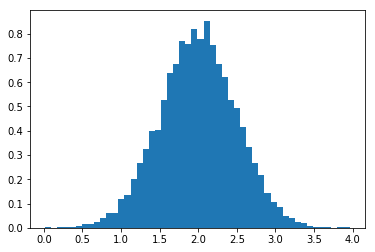

In [226]:
import numpy as np
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

In [227]:
n,bins=np.histogram(v,bins=50,normed=True)

In [228]:
n

array([ 0.00126778,  0.        ,  0.00380333,  0.00126778,  0.00380333,
        0.00633888,  0.01648108,  0.01394553,  0.02281996,  0.04183658,
        0.06085321,  0.06212099,  0.11663533,  0.13691973,  0.20157627,
        0.26496503,  0.3232827 ,  0.39808144,  0.40188477,  0.52612674,
        0.63895874,  0.67445645,  0.76827182,  0.75812962,  0.81771506,
        0.77841402,  0.85321277,  0.75305852,  0.67572423,  0.62247766,
        0.52612674,  0.49316459,  0.41329474,  0.33215712,  0.26496503,
        0.2155218 ,  0.14325861,  0.1077609 ,  0.08494094,  0.04690769,
        0.04056881,  0.02535551,  0.01774885,  0.00633888,  0.0050711 ,
        0.0050711 ,  0.00253555,  0.        ,  0.00126778,  0.00126778])

In [229]:
bins

array([ 0.0183463 ,  0.09722463,  0.17610296,  0.25498129,  0.33385963,
        0.41273796,  0.49161629,  0.57049462,  0.64937295,  0.72825129,
        0.80712962,  0.88600795,  0.96488628,  1.04376461,  1.12264295,
        1.20152128,  1.28039961,  1.35927794,  1.43815628,  1.51703461,
        1.59591294,  1.67479127,  1.7536696 ,  1.83254794,  1.91142627,
        1.9903046 ,  2.06918293,  2.14806127,  2.2269396 ,  2.30581793,
        2.38469626,  2.46357459,  2.54245293,  2.62133126,  2.70020959,
        2.77908792,  2.85796626,  2.93684459,  3.01572292,  3.09460125,
        3.17347958,  3.25235792,  3.33123625,  3.41011458,  3.48899291,
        3.56787124,  3.64674958,  3.72562791,  3.80450624,  3.88338457,
        3.96226291])

In [230]:
plt.plot(.5*(bins[1:]+bins[:-1]), n)

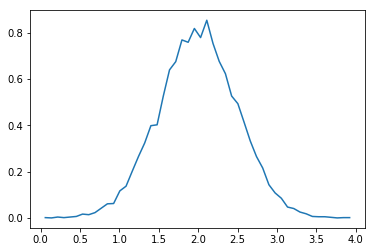

In [231]:
plt.show()